In [56]:
import numpy as np

In [218]:
def readNeaSpectrumNew(filename):
    # reader tested for neascan version 2.1.10719.0
    fid = open(filename,errors='replace')
    spectrum = {}

    linestring = fid.readline()
    Nlines = 1

    while 'Row' not in linestring:
        Nlines += 1
        linestring = fid.readline()
        if Nlines > 1:
            ct = linestring.split('\t')
            fieldname = ct[0][2:-1]
            fieldname = fieldname.replace(' ', '')

            if 'Scanner Center Position' in linestring:
                fieldname = fieldname[:-5]
                spectrum[fieldname] = [float(ct[2]), float(ct[3])]

            elif 'Scan Area' in linestring:
                fieldname = fieldname[:-7]
                spectrum[fieldname] = [float(ct[2]), float(ct[3]), float(ct[4])]

            elif 'Pixel Area' in linestring:
                fieldname = fieldname[:-7]
                spectrum[fieldname] = [int(ct[2]), int(ct[3]), int(ct[4])]

            elif 'Interferometer Center/Distance' in linestring:
                fieldname = fieldname.replace('/', '')
                spectrum[fieldname] = [float(ct[2]), float(ct[3])]

            elif 'Regulator' in linestring:
                fieldname = fieldname[:-7]
                spectrum[fieldname] = [float(ct[2]), float(ct[3]), float(ct[4])]

            elif 'Q-Factor' in linestring:
                fieldname = fieldname.replace('-', '')
                spectrum[fieldname] = float(ct[2])

            else:
                fieldname = ct[0][2:-1]
                fieldname = fieldname.replace(' ', '')
                val = ct[2]
                val = val.replace(',','')
                try:
                    spectrum[fieldname] = float(val)
                except:
                    spectrum[fieldname] = val.strip()
        # print(fieldname)
        # print(spectrum[fieldname])

    channels = linestring.split('\t')
    # print(Nlines)
    fid.close()

    if "PTE+" in spectrum['Scan']:
        C_data = np.genfromtxt(filename, skip_header=Nlines, encoding='utf-8')
    else:
        C_data = np.genfromtxt(filename, skip_header=Nlines)

    # print(np.shape(C_data))
    for i in range(len(channels)-2):
        if spectrum['PixelArea'][1] and spectrum['PixelArea'][0] == 1:
            if "PTE+" in spectrum['Scan']:
                spectrum[channels[i]] = np.reshape(C_data[:,i], (spectrum['PixelArea'][2], spectrum['PixelArea'][0]))
            else:
                spectrum[channels[i]] = np.reshape(C_data[:,i], (spectrum['PixelArea'][2]*2, spectrum['PixelArea'][0]))
        else:
            if "PTE+" in spectrum['Scan']:
                spectrum[channels[i]] = np.reshape(C_data[:,i], (spectrum['PixelArea'][0], spectrum['PixelArea'][1], spectrum['PixelArea'][2]))
            else:
                spectrum[channels[i]] = np.reshape(C_data[:,i], (spectrum['PixelArea'][0], spectrum['PixelArea'][1], spectrum['PixelArea'][2]*2))


    return spectrum


In [202]:
import os
current_folder = os.getcwd()
file_path = os.path.join(current_folder,'pte1.txt')
print(file_path)

c:\Users\NEMETHG\OneDrive\Python\NeaReader\pte1.txt


In [219]:
s = readNeaSpectrumNew(file_path)
print(list(s.keys()))
print(list(s.values()))

30
(9630, 10)


Pointspectroscopy PTE+
(30, 1, 321)
[1820. 1819. 1818. 1817. 1816. 1815. 1814. 1813. 1812. 1811. 1810. 1809.
 1808. 1807. 1806. 1805. 1804. 1803. 1802. 1801. 1800. 1799. 1798. 1797.
 1796. 1795. 1794. 1793. 1792. 1791. 1790. 1789. 1788. 1787. 1786. 1785.
 1784. 1783. 1782. 1781. 1780. 1779. 1778. 1777. 1776. 1775. 1774. 1773.
 1772. 1771. 1770. 1769. 1768. 1767. 1766. 1765. 1764. 1763. 1762. 1761.
 1760. 1759. 1758. 1757. 1756. 1755. 1754. 1753. 1752. 1751. 1750. 1749.
 1748. 1747. 1746. 1745. 1744. 1743. 1742. 1741. 1740. 1739. 1738. 1737.
 1736. 1735. 1734. 1733. 1732. 1731. 1730. 1729. 1728. 1727. 1726. 1725.
 1724. 1723. 1722. 1721. 1720. 1719. 1718. 1717. 1716. 1715. 1714. 1713.
 1712. 1711. 1710. 1709. 1708. 1707. 1706. 1705. 1704. 1703. 1702. 1701.
 1700. 1699. 1698. 1697. 1696. 1695. 1694. 1693. 1692. 1691. 1690. 1689.
 1688. 1687. 1686. 1685. 1684. 1683. 1682. 1681. 1680. 1679. 1678. 1677.
 1676. 1675. 1674. 1673. 1672. 1671. 1670. 1669. 1668. 1667. 1666. 1665.
 1664. 1663. 16

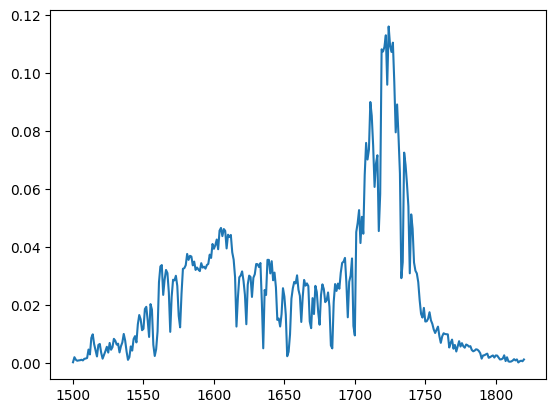

In [216]:
print(s["Scan"])
print(np.shape(s["Wavenumber"]))
test = s["Wavenumber"]
print(test[0,0,:])
import matplotlib.pyplot as plt
plt.plot(s["Wavenumber"][0,0,:], s["PTE"][0,0,:])
plt.show()